In [ ]:
import tensorflow as tf

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
import matplotlib.pyplot as plt
img_rows, img_cols = 28, 28 # 사이즈만 적어도 자동으로 적용 된다.

In [ ]:
# 데이터셋 분리

(x_train, y_train), (x_test, y_test) = mnist.load_data() # x는 실제 이미지, y는 이미지에 대한 숫자(label)
print(K.image_data_format()) # 백엔드에서 돌아라.

11501568/11490434 [==============================] - 0s 0us/step
channels_last


In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # 트레인이미지 전체 개수, 행, 열, 흑백 형태로 reshape 해주고 그걸 x_train에 업데이트 해준다.
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) # 트레인이미지 전체 개수, 행, 열, 흑백 형태로 reshape 해주고 그걸 x_train에 업데이트 해준다.

input_shape = (img_rows, img_cols, 1) # 입력할 형태를 변수에 지정해 준다.

In [ ]:
# type 변경 -> 부동소숫점 표현을 위해 타입을 바꿔줘야 한다.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# 정규화

x_train/=255 # 데이터가 0~255이므로 0~1로 정규화하기 위해 255로 나눠줘라.
x_test/=255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 전체 6만 개, 28*28 사이즈, 1은 흑백
# 트레인데이터 6만 개, 테스트 데이터 1만 개

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# one-hot encoding 활용한 범주화

y_train = tf.keras.utils.to_categorical(y_train, 10) # 0~9까지 나눠주기 위해 10을 넣는다.
y_test = tf.keras.utils.to_categorical(y_test, 10) # 0~9까지 나눠주기 위해 10을 넣는다.

# import 할 때 from tensorflow.keras.utils import to_categorical 이렇게 불러오고 to_catagorical 이라고 해도 된다.

In [ ]:
# modeling (출력층은 0~9 사이로 맞춰준다.)

'''
# Sequential() 사용할 경우
sequential()
model.add()

# funtional() 사용할 경우
funtional()
x=
f(x) = x
g(x) = f(x)
'''

# Sequential() 활용 modeling

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape)) # 첫 번째 노드 32개, 3*3짜리 필터, activation은 relu, 첫 번째는 input_shape를 정의해 줘야 함


In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # pool_size 적용하면 크기가 줄어든다. 여기서는 가로세로 절반으로 축소, maxpooling이므로 특징값만 추출

In [ ]:
model.add(Dropout(0.25)) # 25%를 버리기, 과적합 방지 다음 Conv 가기 전에 해야 한다. 순서 중요
model.add(Flatten()) # 전체 64개, 3*3 큐브형태, 3차원 형태에서 1차원 형태로 바꿔준다.
model.add(Dense(128, activation='relu')) # 이미 1차원 형태로 바꿔줬기 때문에 새로 Dense layer 쌓을 때 노드 수, activation만 적는다.
model.add(Dropout(0.5)) # 50% 날려버리기

# 출력층 (0~9)

model.add(Dense(10, activation='softmax')) # 여기서는 softmax 써야 함


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
# flatten 보면 9216 인데 위 12, 12, 64 를 곱해준 것이다. 1179776 은 계산 횟수
# 지금까지는 전체 계산을 할 수 있는 모델 구축만 한 것이다.

In [ ]:
# 환경 설정 (model 학습)

model.compile(loss = keras.losses.categorical_crossentropy, # loss 값은 교차검증
              optimizer = 'adam', # optimizer는 adam
              metrics=['accuracy']) # 평가척도는 정확도(accuracy)

In [ ]:
# 학습
history = model.fit(x_train, y_train, # 훈련용 데이터는 뭐로 할 거냐> train 데이터!
          batch_size = 128, # 128개의 학습데이터를 처리할때마다 내부 개수를 업데이트하겠다는 이야기
          epochs = 12, # 12회
          verbose=1, # 표시할 거면 1 아니면 0
          validation_data=(x_test, y_test)) # 검증용 데이터는 뭐로 할 거냐> test 데이터!

Epoch 1/12
469/469 [==============================] - 146s 277ms/step - loss: 0.4631 - accuracy: 0.8525 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 2/12
469/469 [==============================] - 127s 271ms/step - loss: 0.0916 - accuracy: 0.9730 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 3/12
469/469 [==============================] - 126s 269ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0302 - val_accuracy: 0.9901
Epoch 4/12
469/469 [==============================] - 126s 269ms/step - loss: 0.0502 - accuracy: 0.9856 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 5/12
469/469 [==============================] - 126s 268ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 6/12
469/469 [==============================] - 126s 268ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 7/12
469/469 [==============================] - 126s 268ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0295 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) # 평가는 무조건 test 데이터!

In [ ]:
print('Test loss: ', score[0]) # evaluate는 [0]은 loss 값
print('Test accuracy: ', score[1]) # evaluate는 [1]은 accuracy 값

Test loss:  0.028063882142305374
Test accuracy:  0.9926999807357788


In [ ]:
print(history.history.keys()) # history 안에 뭐가 있는지 확인

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


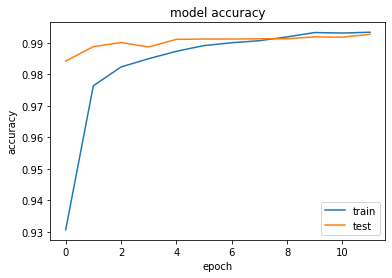

In [ ]:
# plt.plot으로 전부 그려보기 > 정확도 확인
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

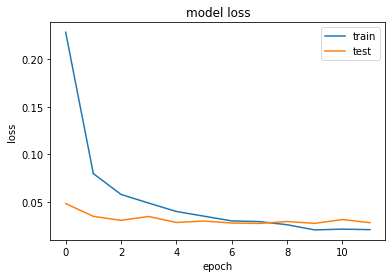

In [ ]:
# loss 값 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# test의 loss값이 약간 올라갔지만 이정도면 괜찮다.

In [ ]:
# 모델 저장
model.save('mnist_css.h5')
print('saved')

saved
